In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda


In [ ]:
BATCH_SIZE = 100
EPOCH = 20
LR = 1e-3

In [ ]:
transform = transforms.ToTensor()

train_DS = datasets.CIFAR10(  # DS = DataSet의 약자
    root='/content/drive/MyDrive/DeepLearning/data',
    train=True,
    download=True,
    transform=transform
)
test_DS = datasets.CIFAR10(
    root='/content/drive/MyDrive/DeepLearning/data',
    train=False,
    download=True,
    transform=transform
)

train_DL = DataLoader(  # DL = DataLoader의 약자
    train_DS,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_DL = DataLoader(
    test_DS,
    batch_size=BATCH_SIZE,
    shuffle=True
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print(train_DS.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


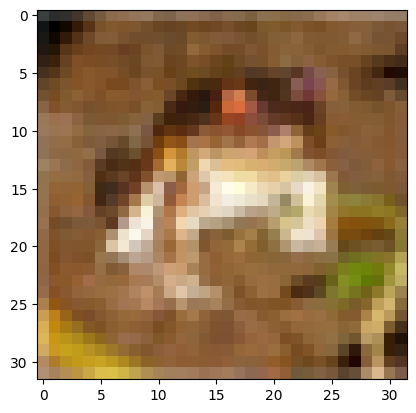

6
(32, 32, 3)


In [ ]:
plt.imshow(train_DS.data[0])
plt.show()
print(train_DS.targets[0])
print(train_DS.data[0].shape)  # 32x32

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Sequential(nn.Conv2d(3,8,3, padding=1),
                                   nn. BatchNorm2d(8),  # output에 맞추기
                                   nn.ReLU())
        self.Maxpool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Sequential(nn.Conv2d(8,16,3, padding=1),
                                   nn. BatchNorm2d(16),
                                   nn.ReLU())
        self.Maxpool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Sequential(nn.Conv2d(16,32,3, padding=1),
                                   nn. BatchNorm2d(32),
                                   nn.ReLU())
        self.Maxpool3 = nn.MaxPool2d(2)
        self.fc = nn.Linear(32*4*4, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.Maxpool1(x)
        x = self.conv2(x)
        x = self.Maxpool2(x)
        x = self.conv3(x)
        x = self.Maxpool3(x)
        x = torch.flatten(x, start_dim=1)
        x = self.fc(x)
        return x

model = ConvNet().to(DEVICE)
print(model)

ConvNet(
  (conv1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (Maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (Maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (Maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DeepLearning')

Epoch: 1, train loss: 1.422
--------------------
Epoch: 2, train loss: 1.132
--------------------
Epoch: 3, train loss: 1.025
--------------------
Epoch: 4, train loss: 0.964
--------------------
Epoch: 5, train loss: 0.919
--------------------
Epoch: 6, train loss: 0.888
--------------------
Epoch: 7, train loss: 0.855
--------------------
Epoch: 8, train loss: 0.835
--------------------
Epoch: 9, train loss: 0.813
--------------------
Epoch: 10, train loss: 0.798
--------------------
Epoch: 11, train loss: 0.782
--------------------
Epoch: 12, train loss: 0.769
--------------------
Epoch: 13, train loss: 0.757
--------------------
Epoch: 14, train loss: 0.746
--------------------
Epoch: 15, train loss: 0.736
--------------------
Epoch: 16, train loss: 0.726
--------------------
Epoch: 17, train loss: 0.721
--------------------
Epoch: 18, train loss: 0.712
--------------------
Epoch: 19, train loss: 0.702
--------------------
Epoch: 20, train loss: 0.694
--------------------


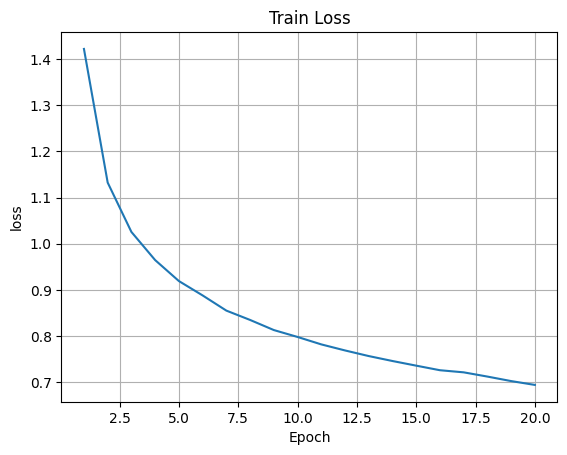

In [ ]:
from functions import *

model.train()

optimizer = torch.optim.Adam(model.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss()

loss_history = Train(model, train_DL, criterion, optimizer, EPOCH, DEVICE)

save_model_path = '/content/drive/MyDrive/Colab Notebooks/result/CNN_CIFAR10.pt'
torch.save(model, save_model_path)

plt.plot(range(1, EPOCH+1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Train Loss')
plt.grid()

In [ ]:
load_model = torch.load(save_model_path, map_location=DEVICE)

In [ ]:
Test(load_model, test_DL, DEVICE)
print(count_params(load_model))

Test accuracy: 6867/10000 (68.7 %)
11274


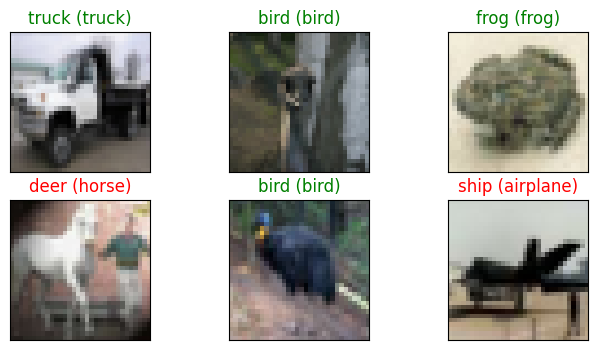

In [ ]:
Test_plot(load_model, test_DL, DEVICE)